# Standardization (Feature Scaling)

- Feature Scaling is a technique to standardize the independent features present in the data in fixed range (Also calles Z-Score Normalization)
- Feautre Scaling is done after feature engineering and just before giving the data to the model to train
- There are 2 types of feature scaling 
    - Standardization
    - Normalization
- Formula to calculate Standardization
    - x' = x - x(bar) / e
    - x' is new feature 
    - x is original feature
    - x(bar) is mean
    - e is sigma (Std. Deviation)

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [6]:
df.sample(10)

,Age,EstimatedSalary,Purchased
253,37,146000,1
4,19,76000,0
19,48,29000,1
251,37,52000,0
363,42,79000,0
141,18,68000,0
195,34,43000,0
330,38,51000,0
57,28,79000,0
276,38,71000,0


### Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### Standard Scalar

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [13]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
# As the X_train_scaled is in form of array, conveerting it into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### Effect of Scaling

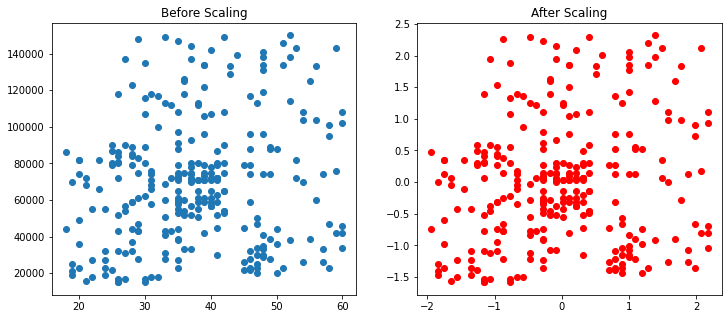

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<AxesSubplot:title={'center':'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

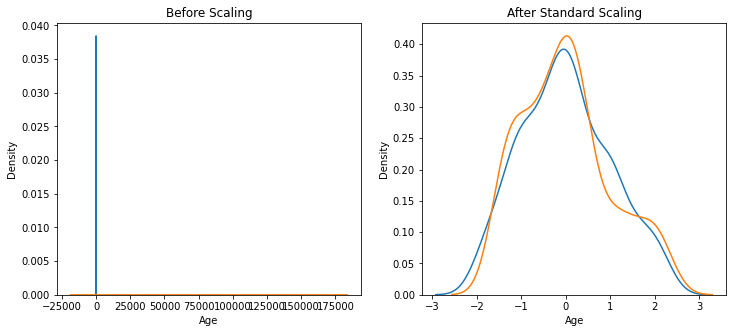

In [16]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

### Why scaling is important?
- It improves the accuracy of the data and model

In [17]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))
## It Improves Accuracy ##

Actual 0.6583333333333333
Scaled 0.8666666666666667


# Made by Nitesh Addagatla
- LinkidIn: https://www.linkedin.com/in/nitesh-addagatla/
- GitHub: https://github.com/niteshA04
- Kaggle: https://www.kaggle.com/niteshaddagatla